#Polynomial Regression

#Data Preprocessing Tools

##Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importing the dataset

In [ ]:
df = pd.read_csv('Position_Salaries.csv')

In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
x = df.iloc[:,-2].values
y= df.iloc[:,-1].values
# y= dataset['Profit']
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
x=x.reshape(-1,1)
print(x.shape)
print(y.shape)
x

(10, 1)
(10,)


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

##Taking care of the missing data

In [ ]:
# missing_data = dataset.isnull().sum()
# missing_data
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values =np.nan,strategy='mean')
# imputer.fit(x[:,1:3])
# x[:,1:3]=imputer.transform(x[:,1:3])

In [ ]:
# print(x)

##Encoding categorical data

###Encoding independent variable

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

In [ ]:
# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])] ,
#                        remainder='passthrough' )

In [ ]:
# x1=np.array(ct.fit_transform(x))
# x1

###Encoding dependent variable

In [ ]:
# y

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y1=le.fit_transform(y)
# y1

##Splittinf dataset into training_dataset and test_dataset

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size =0.40,random_state=42)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[ 8]
 [ 3]
 [10]
 [ 5]
 [ 4]
 [ 7]]
[[9]
 [2]
 [6]
 [1]]
[ 300000   60000 1000000  110000   80000  200000]
[500000  50000 150000  45000]


##Feature Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train[:,3:] = scaler.fit_transform(x_train[:,3:])
# x_test[:,3:] = scaler.transform(x_test[:,3:])

# feature scaling is not required for Multiple Linear Regression

In [ ]:
# print(x_train)

In [ ]:
# print(x_test)

#Data Modelling

##Training the Linear Regression model on the training set

In [ ]:
from sklearn.linear_model import LinearRegression
Lin_reg = LinearRegression()
Lin_reg.fit(x_train,y_train)

LinearRegression()

###Predicting the test set results

In [ ]:
y_pred=Lin_reg.predict(x_test)
y_pred

array([ 621770.33492823, -193779.90430622,  272248.80382775,
       -310287.08133971])

In [ ]:
n = len(y_pred)
print(np.concatenate(( y_pred.reshape(n,1),y_test.reshape(n,1) ),1))

[[ 621770.33492823  500000.        ]
 [-193779.90430622   50000.        ]
 [ 272248.80382775  150000.        ]
 [-310287.08133971   45000.        ]]


##Training the Polynomial Linear Regression model on the training set

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Poly_Lin_reg = PolynomialFeatures(degree=4)
x_poly_train=Poly_Lin_reg.fit_transform(x_train)
x_poly_train

array([[1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

In [ ]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly_train,y_train)

LinearRegression()

###Predicting the test set results

In [ ]:
x_poly_test=Poly_Lin_reg.fit_transform(x_test)
x_poly_test

array([[1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]])

In [ ]:
y_pred2=lin_reg2.predict(x_poly_test)
y_pred2

array([534329.11392378, 111316.45569715, 148926.58227862, 308884.38818834])

In [ ]:
n = len(y_pred2)
print(np.concatenate(( y_pred2.reshape(n,1),y_test.reshape(n,1) ),1))

[[534329.11392378 500000.        ]
 [111316.45569715  50000.        ]
 [148926.58227862 150000.        ]
 [308884.38818834  45000.        ]]


# Mean Squared Error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of the model is: ', mse)
# Model Accuracy Score

train_accuracy = model.score(x_train_value, y_train.values.ravel())
test_accuracy = model.score(x_test_value, y_test.values.ravel())

print(f"Training Accuracy: {round(train_accuracy, 2)}")
print(f"Testing Accuracy: {round(test_accuracy, 2)}")

In [ ]:
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

In [ ]:
r2score = r2_score(y_test, y_pred)
r2score2 = r2_score(y_test, y_pred2)
print(f'R2 Score of the model is: ', r2score)
print(r2score2)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of the model is: ', mse)

R2 Score of the model is:  -0.5580551383902064
0.4606567401731073
Mean Squared Error of the model is:  53857584104.07271


#**Data Visualisation**

##Linear Regression

### Visualising the training set results

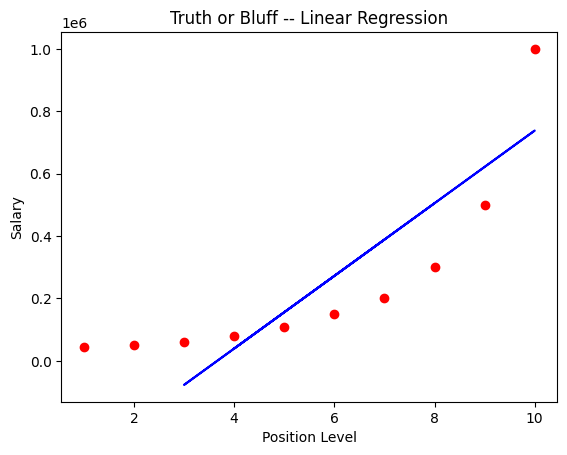

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x_train,Lin_reg.predict(x_train),color='blue')
plt.title("Truth or Bluff -- Linear Regression")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualising the test set results

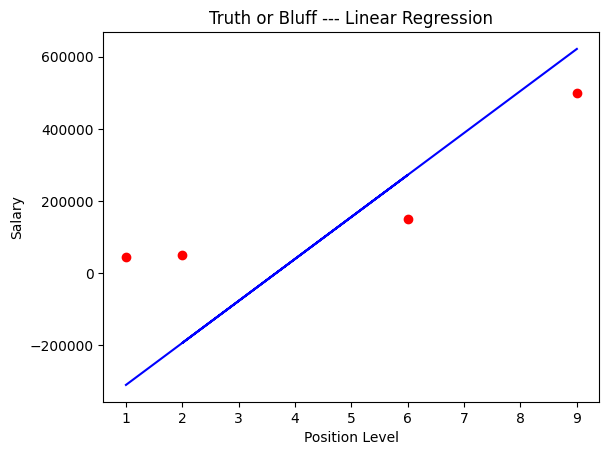

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title("Truth or Bluff --- Linear Regression")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

##Polynomial Regression

In [ ]:
x.shape

(10, 1)

In [ ]:
x_train.shape

(6, 1)

In [ ]:
x_poly_train.shape

(6, 5)

###Visualising the training dataset

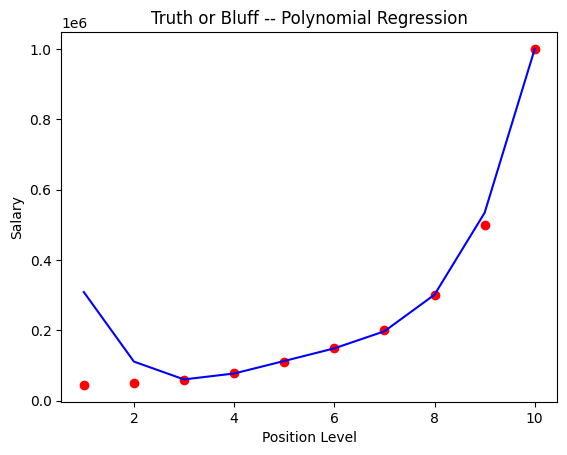

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg2.predict(Poly_Lin_reg.fit_transform(x)),color='blue')
plt.title("Truth or Bluff -- Polynomial Regression")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

###Visualising the test dataset

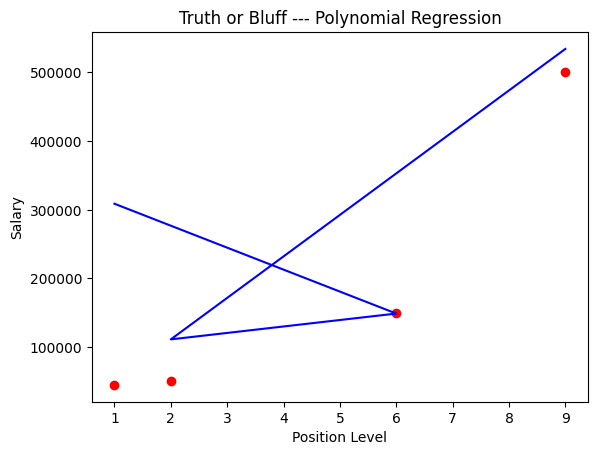

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred2,color='blue')
plt.title("Truth or Bluff --- Polynomial Regression")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
Lin_reg.predict([[6.5]])

array([330502.3923445])

In [ ]:
lin_reg2.predict(Poly_Lin_reg.fit_transform([[6.5]]))

array([169667.52373431])